<a href="https://colab.research.google.com/github/marcelo-guimaraes/Data-Science/blob/master/insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Esse projeto foi criado para solucionar um desafio proposto pelo [Meigarom](https://www.instagram.com/meigarom.datascience/) em um post de seu blog. Mais informações [aqui](https://sejaumdatascientist.com/os-5-projetos-de-data-science-que-fara-o-recrutador-olhar-para-voce/)

O objetivo do projeto de Insights é recomendar soluções para o negócio através de Insights gerados por uma ótima Análise Exploratória de Dados.

## Contexto do Desafio
A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

Você é um Data Scientist contrato pela empresa para ajudar a encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.

Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

#### Portanto, seu trabalho como Data Scientist é responder as seguinte perguntas:

1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?


2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?


3. A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

#### Começarei a resolver o problema importando as bibliotecas que utilizarei e em seguida carregando os dados 

In [0]:
!pip install ppscore
#!pip install folium
import folium 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns 
import numpy as np
import scipy.stats as st
import ppscore as pps
import missingno as msno
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('/content/drive/My Drive/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Aqui checo se há Missing Values que precisam ser tratados

In [7]:
#msno.matrix(df);
#msno.heatmap(df);
#msno.bar(df.sample(1000));
#msno.dendrogram(df);
df.isnull().sum().sum()

0

#### Bom, os dados foram importados sem nenhum problema e também não possuem valores faltantes. Portanto já posso formar minhas hipóteses sobre os dados que são as seguintes: 


- Casas maiores são mais caras

- Casas com mais banheiros e/ou quartos tendem a valer mais

- Casas mais novas custam mais 

- Vale a pena comprar uma casa antiga e reforma-la para vendê-la com um valor mais alto

### Agora começarei minha análise exploratória a fim de responder as perguntas do desafio e validar minhas hipóteses

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


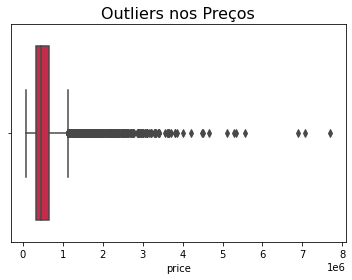

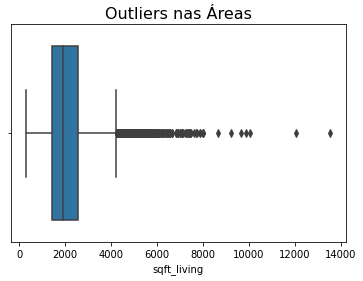

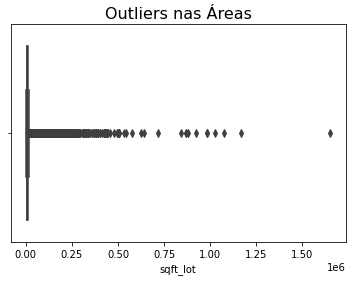

In [9]:
plt.figure(1); plt.title('Outliers nos Preços', fontsize = 16)
sns.boxplot(df['price'], color = 'crimson');
plt.figure(2); plt.title('Outliers nas Áreas', fontsize = 16)
sns.boxplot(df['sqft_living']);
plt.figure(3); plt.title('Outliers nas Áreas', fontsize = 16)
sns.boxplot(df['sqft_lot']);

 - Com base nas primeiras análises, podemos perceber que o preço médio das casas é de \$ 540.000 enquanto a mediana é \$ 450.000 e o Desvio Padrão é de aproximadamente \$ 367.000. Ou seja, possuímos muitos outliers nos valores dos imóveis.  
 - Para as áreas das casas, a situação não é diferente, pois também temos diversos imóveis que fogem do padrão. O que dificulta a análise de preços.
 - As casas mais velhas desse dataset são de 1971 e as mais novas são de 2015

#### Visualizarei a correlação entre as características da casa com o preço dela

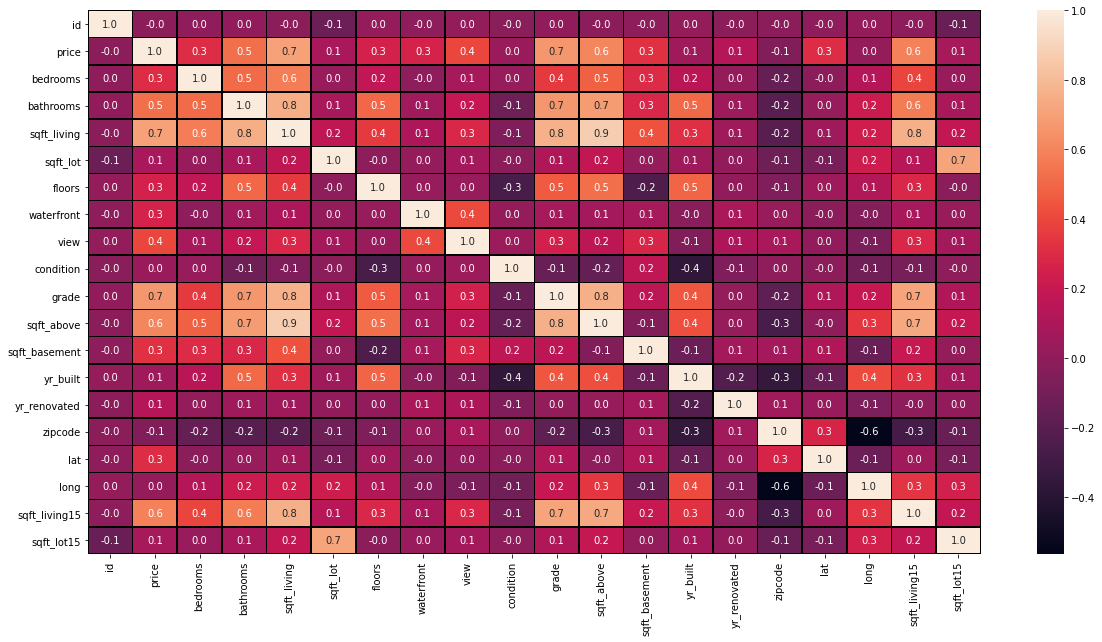

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="Black",fmt="1.1f");

Com esse gráfico podemos perceber que as características de uma casa que mais se correlacionam de maneira positiva com o preço são:

- O número de quartos          
- O número de banheiros 
* O tamanho da sala de estar
* O número de andares
* A coluna ` grade ` e a coluna `view`
* A latitude do imóvel
* A área do(s) andar(es) acima do térreo




Com base nesses dados também, posso checar 3 de 4 das minhas hipoteses:
1. Percebemos que casas com mais banheiros e mais quartos realmente tendem a valer mais.
2. Casas maiores também costumam ser mais caras.
3. Aparentemente o ano em que a casa foi construída não interfere tanto em seu preço

### Agora analisarei melhor a relação entre a quantidade de quartos e banheiros do imóvel com seu preço

Primeiro vale ressaltar que há uma anomalia com os dados dos banheiros. Pois eles estão no tipo float enquanto o certo seria um número inteiro. Ao menos duvido muito que um lavabo conte como 0.50 banheiros. Portanto, irei tratar os dados arredondando eles para cima

In [11]:
df[['bathrooms','bedrooms']].dtypes

bathrooms    float64
bedrooms       int64
dtype: object

In [0]:
df['bathrooms'] = np.ceil(df['bathrooms']).astype(int)

Feito! Começarei analisando os dados dos quartos

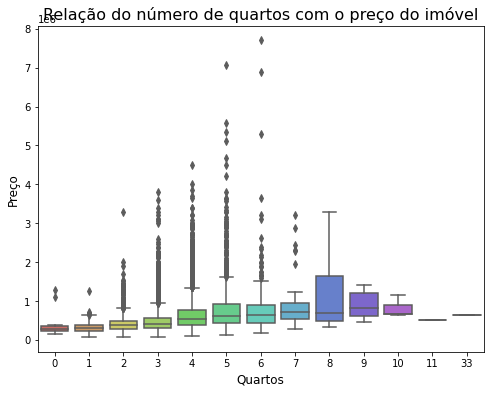

In [13]:
plt.figure(figsize = (8,6))
sns.boxplot(x = "bedrooms", y = "price", data = df, palette = "hls");
plt.title('Relação do número de quartos com o preço do imóvel', fontsize = 16);
plt.xlabel('Quartos', fontsize = 12);
plt.ylabel('Preço', fontsize = 12);

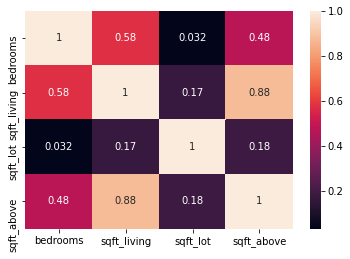

In [14]:
sns.heatmap(df[['bedrooms','sqft_living',	'sqft_lot', 'sqft_above']].corr(), annot = True);

Notamos que também possuímos alguns outliers nos registros de quartos, por exemplo um imóvel com 33 deles. Entretanto, aparentemente o número de quartos não afeta tão drásticamente o valor do imóvel. Uma vez que os maiores preços são decorrentes dos outliers.

##### Afim de entender melhor a relação entre o número de quartos com os preços, aqui busco analisar a média de preços e a média de tamanhos dos imóveis baseado na quantidade de quartos. Tendo em mente que correlação não é causalidade, eu não posso afirmar que o aumento no preço de um imóvel se dá pelo número maior de quartos, uma vez que casas com maiores quantidades de quartos também costumam ser maiores, o que afeta diretamente o valor do imóvel

In [15]:
x = df.groupby('bedrooms')['price'].mean()
y = df.groupby('bedrooms')['sqft_living'].mean()
z = df.groupby('bedrooms')['sqft_above'].mean()
print(np.round(x[0:3].std()), np.round(x[3:6].std()), np.round(x[6:34].std()))
pd.DataFrame([x,y,z]).T

50851.0 160268.0 194230.0


,price,sqft_living,sqft_above
bedrooms,,,
0,4.095038e+05,1707.846154,1707.846154
1,3.176429e+05,884.613065,823.859296
2,4.013727e+05,1239.752899,1107.240942
3,4.662321e+05,1805.837235,1584.442284
4,6.354195e+05,2554.649666,2198.300639
5,7.865998e+05,3047.545284,2407.566521
6,8.255206e+05,3284.341912,2494.386029
7,9.511847e+05,3974.210526,3160.263158
8,1.105077e+06,3800.000000,2660.769231


Por conta dos outliers, fica muito difícil de interpretar os dados utilizando apenas as médias. Portanto prosseguirei utilizando a mediana. Dessa forma, não terei tanta interferência de outliers na análise

In [16]:
a = df.groupby('bedrooms')['price'].median()
b = df.groupby('bedrooms')['sqft_living'].median()
c = df.groupby('bedrooms')['sqft_above'].median()
print(np.round(a[0:3].std()), np.round(a[3:6].std()), np.round(a[6:34].std()))
pd.DataFrame([a,b,c]).T

46801.0 105291.0 91056.0


,price,sqft_living,sqft_above
bedrooms,,,
0,288000.0,1470.0,1470.0
1,299000.0,780.0,760.0
2,374000.0,1140.0,1010.0
3,413000.0,1680.0,1440.0
4,549997.5,2410.0,2080.0
5,620000.0,2870.0,2190.0
6,650000.0,2955.0,2340.0
7,728580.0,3335.0,2820.0
8,700000.0,3840.0,2530.0


Bom, com base nesses dados podemos observar melhor que a quantidade de quartos não altera muito expressivamente o valor do imóvel. Pois na maior parte dos casos, quando há um grande aumento no preço em relação ao número de quartos, há também um grande aumento nas áreas do imóvel. Ex: Na mediana, o imóvel com 4 quartos custa $ 137000 a mais do que o imóvel com 3 quartos. Entretanto, as áreas do imóvel com 4 quartos é muito maior do que as áreas do que tem 3 quartos. Já quando não temos uma mudança tão expressiva nas áreas, como ocorre com os imóveis de 5 e 6 quartos, o preço do imóvel pouco se altera também. Portanto, podemos concluir até o momento que o número de quartos pode elevar sim o preço da casa, entretanto essa pode não ser a melhor reforma. 

Agora analisarei os dados dos banheiros

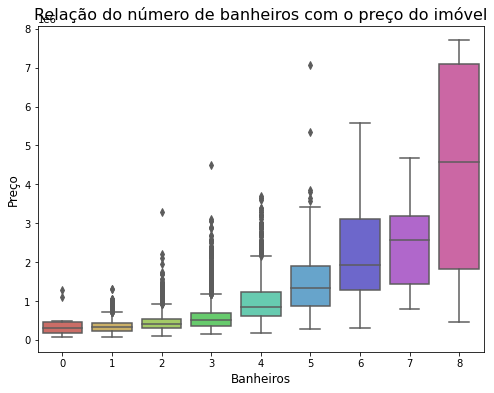

In [17]:
plt.figure(figsize = (8,6))
sns.boxplot(x = "bathrooms", y = "price", data = df, palette = "hls");
plt.title('Relação do número de banheiros com o preço do imóvel', fontsize = 16)
plt.xlabel('Banheiros', fontsize = 12);
plt.ylabel('Preço', fontsize = 12);


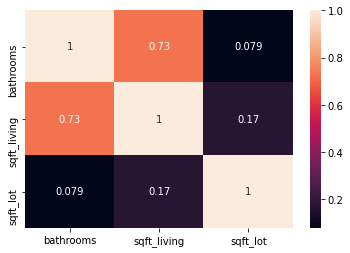

In [18]:
sns.heatmap(df[['bathrooms','sqft_living',	'sqft_lot']].corr(), annot = True);

A princípio, percebemos que o número de banheiros tem uma relação muito significante e positiva com o preço do imóvel. Entretanto, também possui uma correlação muito forte com a área da casa, o que pode significar mais uma vez que esse aumento no preço se dá principalmente pelo aumento da área e não apenas por possuir um ou mais cômodos

In [19]:
d = df.groupby('bathrooms')['price'].median()
e = df.groupby('bathrooms')['sqft_living'].median()
f = df.groupby('bathrooms')['sqft_above'].median()
print(np.round(c[0:3].std()), np.round(c[3:6].std()), np.round(c[6:9].std()))
pd.DataFrame([d,e,f]).T

360.0 405.0 242.0


,price,sqft_living,sqft_above
bathrooms,,,
0,317500.0,1157.0,1157.0
1,319925.0,1121.0,1040.0
2,410000.0,1670.0,1350.0
3,515000.0,2320.0,1990.0
4,857326.0,3450.0,2790.0
5,1325000.0,4510.0,3750.0
6,1920000.0,6500.0,5090.0
7,2563445.0,7750.0,5600.0
8,4582500.0,10970.0,8715.0


Aqui, pode-se visualizar uma relação muito parecida com a dos quartos. Um banheiro a mais tem sim uma certa relevância para caracterizar um aumento de preço, entretanto, aparentemente esses aumentos são causados principalmente pois casas com mais banheiros costumam ter maiores áreas, e não por conta dos banheiros em si.

#### Agora farei uma análise dos possíveis imóveis que mais lucrativos levando em conta que as características que mais contribuem para os preços dos imóveis são: `sqft_living`, `sqft_above` e `bathrooms`, como se pode perceber na matriz de correlação. 

In [20]:
df_analysis = df[['bathrooms', 'price', 'sqft_living','sqft_above',
                  'bedrooms','id','lat', 'long', 'grade']]

x_b = 3

print("Mediana da área da sala de estar para casas com {} banheiros: {}".format(x_b,(df_analysis['sqft_living'][df['bathrooms'] == x_b]).median()))
print("Média da área da sala de estar para casas com {} banheiros: {}".format(x_b,(df_analysis['sqft_living'][df['bathrooms'] == x_b]).mean()))
print("Desvio Padrão da área da sala de estar para casas com {} banheiros: {}".format(x_b,(df_analysis['sqft_living'][df['bathrooms'] == x_b]).std()))
print("Média mais 1 Desvio Padrão: {}\n".format((df_analysis['sqft_living'][df['bathrooms'] == x_b]).mean() +
      (df_analysis['sqft_living'][df['bathrooms'] == x_b]).std()))


print("Média do Preço: {}".format((df_analysis['price'][df['bathrooms'] == x_b]).mean()))
print("Mediana do Preço: {}".format((df_analysis['price'][df['bathrooms'] == x_b]).median()))
print("Desvio Padrão do Preço: {}".format((df_analysis['price'][df['bathrooms'] == x_b]).std()))
print("Média menos 1 Desvio Padrão: {}".format((df_analysis['price'][df['bathrooms'] == x_b]).mean() -
      (df_analysis['price'][df['bathrooms'] == x_b]).std()))

Mediana da área da sala de estar para casas com 3 banheiros: 2320.0
Média da área da sala de estar para casas com 3 banheiros: 2382.411532301121
Desvio Padrão da área da sala de estar para casas com 3 banheiros: 659.5088147683931
Média mais 1 Desvio Padrão: 3041.9203470695143

Média do Preço: 575183.6827549386
Mediana do Preço: 515000.0
Desvio Padrão do Preço: 296875.4924870372
Média menos 1 Desvio Padrão: 278308.1902679014


### Farei em seguida um novo dataframe buscando as casas que possuem os atributos que mais se correlacionam com o valor do imóvel e ao mesmo tempo possuem um preço abaixo do padrão

In [0]:
compensa_area = pd.DataFrame(columns = ['bathrooms','price','sqft_living','grade','sqft_above','bedrooms','id','lat','long'])
compensa_above = pd.DataFrame(columns = ['bathrooms','price','sqft_living','grade','sqft_above','bedrooms','id','lat','long'])
compensa_price = pd.DataFrame(columns = ['bathrooms','price','sqft_living','grade','sqft_above','bedrooms','id','lat','long'])
compensa_medio_area = pd.DataFrame(columns = ['bathrooms','price','sqft_living','grade','sqft_above','bedrooms','id','lat','long'])
compensa_medio_above = pd.DataFrame(columns = ['bathrooms','price','sqft_living','grade','sqft_above','bedrooms','id','lat','long'])
compensa_medio_price = pd.DataFrame(columns = ['bathrooms','price','sqft_living','grade','sqft_above','bedrooms','id','lat','long'])
i= 0 

for i in range(0,9):
  compensa_area = pd.concat([compensa_area, df_analysis[df_analysis['bathrooms'] == i][(df_analysis['sqft_living'] > ((df_analysis['sqft_living'][df['bathrooms'] == i]).mean() + (df_analysis['sqft_living'][df['bathrooms'] == i]).std()))]])
  compensa_price = pd.concat([compensa_price, df_analysis[df_analysis['bathrooms'] == i][(df_analysis['price'] < ((df_analysis['price'][df['bathrooms'] == i]).mean() - (df_analysis['price'][df['bathrooms'] == i]).std()))]])
  compensa_above = pd.concat([compensa_above, df_analysis[df_analysis['bathrooms'] == i][(df_analysis['sqft_above'] > ((df_analysis['sqft_above'][df['bathrooms'] == i]).mean() + (df_analysis['sqft_above'][df['bathrooms'] == i]).std()))]])
  compensa_medio_area = pd.concat([compensa_medio_area, df_analysis[df_analysis['bathrooms'] == i][(df_analysis['sqft_living'] > (df_analysis['sqft_living'][df['bathrooms'] == i]).mean())]])
  compensa_medio_price = pd.concat([compensa_medio_price, df_analysis[df_analysis['bathrooms'] == i][(df_analysis['price'] < ((df_analysis['price'][df['bathrooms'] == i]).mean() - (df_analysis['price'][df['bathrooms'] == i]).std()))]])
  compensa_medio_above = pd.concat([compensa_medio_above, df_analysis[df_analysis['bathrooms'] == i][(df_analysis['sqft_above'] > ((df_analysis['sqft_above'][df['bathrooms'] == i]).mean() + (df_analysis['sqft_above'][df['bathrooms'] == i]).std()))]])
  

compensa_muito = pd.merge(compensa_area, compensa_price, how='inner')
compensa_demais = pd.merge(compensa_muito, compensa_above, how = 'inner')
compensa_medio = pd.merge(compensa_medio_area, compensa_medio_price, how='inner')
compensa_medio_demais = pd.merge(compensa_medio, compensa_medio_above, how='inner')

In [0]:
compensa_demais['new'] = 0
compensa_muito['new'] = 1
compensa_medio_demais['new'] = 2
compensa_medio['new'] = 3

frames = [compensa_demais, compensa_muito, compensa_medio_demais, compensa_medio]

new_df = pd.concat(frames)
new_df = new_df.drop_duplicates(subset = ['id'])

### O que fiz foi seperar os dados das casas em 4 dataframes distintos:

* Primeiro peguei casas que o `sqft_living` e o `sqft_above` fossem maiores que a média mais 1 desvio padrão do `sqft_living` e `sqft_above` de casas com a mesma quantidade de banheiros que a dessa instância. Depois chequei se o `price` da casa era menor que a média menos 1 desvio padrão para casas com aquela mesma quantidade de banheiros e se fosse, essa instância entraria nesse novo dataframe com casas que valem extremamente a pena comprar, pois possuem uma área não só maior que a média, mas uma área maior que a média mais 1 desvio padrão e o preço menor que a média menos 1 desvio padrão.

* O segundo dataframe possuem instâncias em que o `sqft_living` é maior que a média mais 1 desvio padrão do `sqft_living` de casas com a mesma quantidade de banheiros e que o `price` é menor que a média menos 1 desvio padrão.

* No terceiro dataframe utilizei instâncias que o `sqft_living` fosse maior que a média para casas com a mesma quantidade de banheiros, o `sqft_above` fosse maior que a média mais 1 desvio padrão para casas do mesmo grupo e que o `price` fosse menor que a média menos 1 desvio padrão.

* Já no último dataframe, coloquei instâncias que o `sqft_living` fosse maior que a média para casas com a mesma quantidade de banheiros e o `price` fosse menor que a média menos 1 desvio padrão. 

---
##### Pode ter ficado um pouco difícil de compreender, portanto farei alguns plots para que facilite a visualização do que ocorreu. Cada linha representa um dataframe e as casas selecionadas para esses dataframes estão à frente da linha para os gráficos de áreas e atrás da linha para o gráfico de preços. Após, fiz um *inner join* desses dados para selecionar as casas que se encaixavam em todos os filtros.  
---

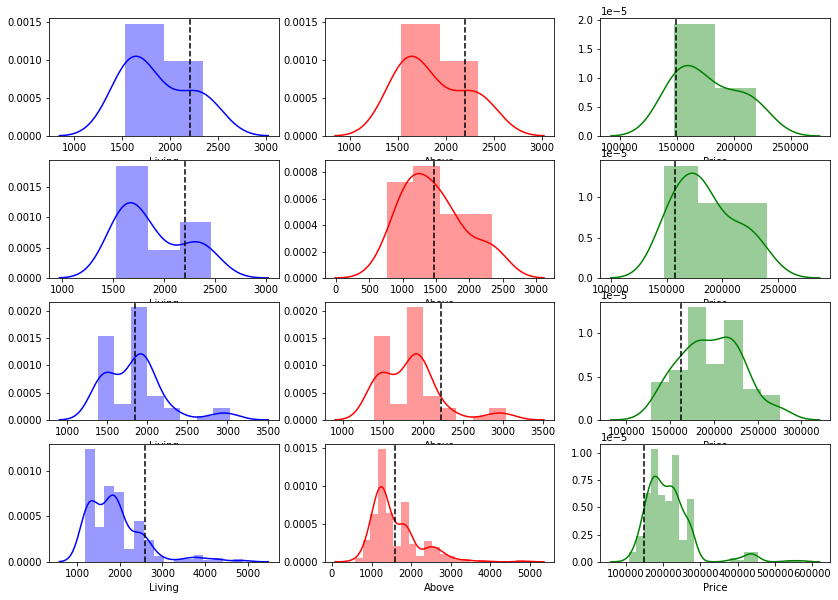

In [23]:
_fig, ((ax1,ax2,ax3), (ax4,ax5,ax6),(ax7,ax8, ax9), (ax10,ax11, ax12)) = plt.subplots(nrows=4, ncols=3, figsize=(14,10))

sns.distplot(compensa_demais['sqft_living'],color='blue',axlabel ='Living', ax=ax1);
ax1.axvline(compensa_demais['sqft_living'].mean() + compensa_demais['sqft_living'].std(), color='black', linestyle='--')
sns.distplot(compensa_demais['sqft_above'],color='r',axlabel ='Above',
             norm_hist= False, kde = True,rug = False,ax=ax2);
ax2.axvline(compensa_demais['sqft_above'].mean() + compensa_demais['sqft_above'].std(), color='black', linestyle='--')
sns.distplot(compensa_demais['price'],color='green',axlabel ='Price', ax=ax3);
ax3.axvline(compensa_demais['price'].mean() - compensa_demais['price'].std(), color='black', linestyle='--')


sns.distplot(compensa_muito['sqft_living'],color='blue',axlabel ='Living', ax=ax4);
ax4.axvline(compensa_muito['sqft_living'].mean() + compensa_muito['sqft_living'].std(), color='black', linestyle='--')
sns.distplot(compensa_muito['sqft_above'],color='r',axlabel ='Above',
             norm_hist= False, kde = True,rug = False,ax=ax5);
ax5.axvline(compensa_muito['sqft_above'].mean(), color='black', linestyle='--')
sns.distplot(compensa_muito['price'],color='green',axlabel ='Price', ax=ax6);
ax6.axvline(compensa_muito['price'].mean() - compensa_muito['price'].std(), color='black', linestyle='--')

sns.distplot(compensa_medio_demais['sqft_living'],color='blue',axlabel ='Living', ax=ax7);
ax7.axvline(compensa_medio_demais['sqft_living'].mean(), color='black', linestyle='--')
sns.distplot(compensa_medio_demais['sqft_above'],color='r',axlabel ='Above',
             norm_hist= False, kde = True,rug = False,ax=ax8);
ax8.axvline(compensa_medio_demais['sqft_above'].mean() + compensa_medio_demais['sqft_above'].std(), color='black', linestyle='--')
sns.distplot(compensa_medio_demais['price'],color='green',axlabel ='Price',
             norm_hist= False, kde = True,rug = False,ax=ax9);
ax9.axvline(compensa_medio_demais['price'].mean() - compensa_medio_demais['price'].std(), color='black', linestyle='--')  
             
sns.distplot(compensa_medio['sqft_living'],color='blue',axlabel ='Living', ax=ax10);
ax10.axvline(compensa_medio['sqft_living'].mean() + compensa_medio['sqft_living'].std(), color='black', linestyle='--')
sns.distplot(compensa_medio['sqft_above'],color='r',axlabel ='Above',
             norm_hist= False, kde = True,rug = False,ax=ax11);
ax11.axvline(compensa_medio['sqft_above'].mean(), color='black', linestyle='--')             
sns.distplot(compensa_medio['price'],color='green',axlabel ='Price',
             norm_hist= False, kde = True,rug = False,ax=ax12);
ax12.axvline(compensa_medio['price'].mean() - compensa_medio['price'].std(), color='black', linestyle='--');                                 

In [24]:
latitude = new_df['lat'].iloc[0]
longitude = new_df['long'].iloc[0]

mapa = folium.Map(location=[latitude, longitude], zoom_start=10)

labels = 4

rainbow = ['#8000ff', '#435ebf', '#24c942', '#ff0000']

for grupo in range(0,labels): 
    group = folium.FeatureGroup(name='<span style=\\"color: {0};\\">{1}</span>'.format(rainbow[grupo-1],grupo))
    for lat, lon, price, label, bath, grade in zip(new_df['lat'], new_df['long'], new_df['price'], new_df['new'],new_df['bathrooms'],new_df['grade']):
        if int(label) == grupo: 
            label = folium.Popup('Price: \$'+ str(price) + '\nBathrooms:' + str(bath) + '\nGrade:' + str(grade), 
                                 parse_html=True)
            folium.CircleMarker(
                (lat, lon),
                radius=5,
                popup=label,
                color=rainbow[grupo-1],
                fill=True,
                fill_color=rainbow[grupo-1],
                fill_opacity=0.7).add_to(group)
    group.add_to(mapa)
folium.map.LayerControl('topright', collapsed=False).add_to(mapa)
#mapa.save(outfile= "mapa.html")
mapa

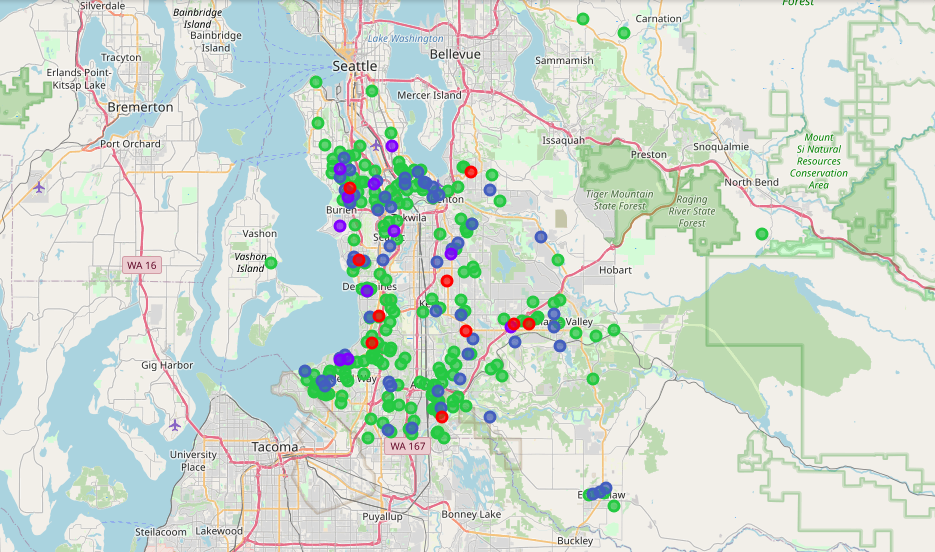

In [34]:
# O gráfico com melhor resolução está disponível no link do colab
Image('/content/drive/My Drive/houses.png', width=800)

E esse foi o resultado de casas que recomendo a compra:

*  O círculo vermelho indica casas que valem extremamente a pena comprá-las, pois possuem as principais características que agregam valor nos imóveis e estão bem abaixo do preço normal. 

* O círculo roxo vem em segundo na ordem de importância e diz respeito as casas que possuem quase todas as características que agregam valor e também estão bem abaixo do valor normal.

* Casas com o círculo azul possuem áreas acima da média e o preço menor que a média menos 1 desvio padrão. Portanto, também vale a pena comprá-las e possivelmente fazer algumas reformas ou incrementos de cômodos para que o imóvel seja ainda mais valorizado.

* Já casas com o círculo verde também estão com o preço abaixo da média menos 1 desvio padrão, entretanto não possuem as características que agregam valor na mesma intensidade que as outras casas ditas anteriormente.

#### Agora, a fim de responder qual o melhor momento de venda de cada imóvel irei verificar se algum período do ano tem alguma relação com um aumento de preços 

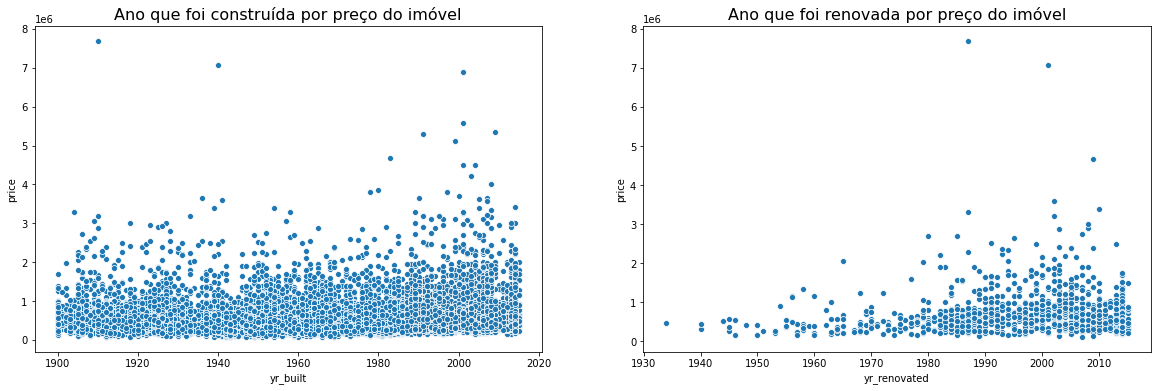

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,6))

ax1.set_title('Ano que foi construída por preço do imóvel', fontsize = 16)
sns.scatterplot(x="yr_built", y = "price", data = df, ax=ax1);

ax2.set_title('Ano que foi renovada por preço do imóvel', fontsize = 16)
sns.scatterplot(x = df['yr_renovated'][df['yr_renovated'] > 0],
                y = "price", data = df, ax=ax2);

No primeiro plot, podemos perceber que minha hipótese sobre os imóveis novos serem mais valiosos é falsa 

In [0]:
df['date'] = df['date'].str.replace('T000000','')

year = []
month = []
day = []

for s in df['date']:
  year.append(int(s[0:4]))
  month.append(int(s[4:6]))
  day.append(int(s[6:8]))

In [0]:
from datetime import datetime, timedelta
dates = []
for s in df['date']:
  dates.append(datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8])))

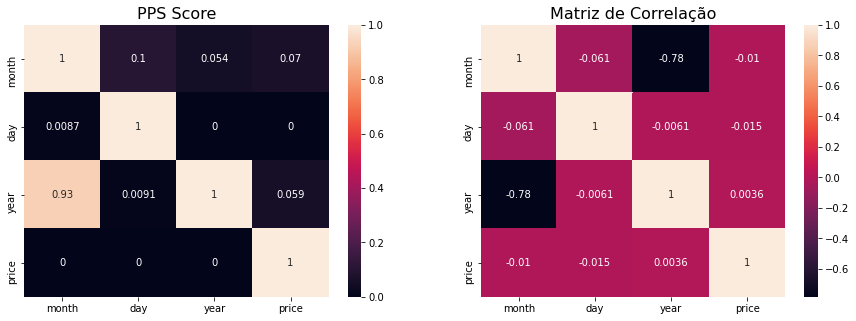

In [29]:
df['year'] = year
df['day'] = day
df['month'] = month
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,5))
ax1.set_title('PPS Score', fontsize = 16)
sns.heatmap(pps.matrix(df[['month','day','year', 'price']]), annot = True, ax=ax1);
ax2.set_title('Matriz de Correlação', fontsize = 16)
sns.heatmap(df[['month','day','year', 'price']].corr(), annot = True, ax=ax2);

O PPS é um escore agnóstico assimétrico que pode detectar relações lineares ou não lineares entre duas colunas. A pontuação varia de 0 (sem poder preditivo) a 1 (poder preditivo perfeito). Pode ser usado como uma alternativa à correlação.
Mais para saber mais, basta clicar [aqui](https://github.com/8080labs/ppscore/blob/master/README.md#calculation-of-the-pps)

Bom, com base no gráfico de dispersão, na correlação e no PPS, eu não pude notar uma relação direta na data da venda com o preço do imóvel. Talvez porque não seja muito comum pessoas ganharem casas como presente de natal, mas essa hipótese pode ser aprofundada em um outro momento :P 

## Conclusão:

1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
 - As casas recomendadas estão plotadas no mapa com seus respectivos valores e sua ordem de prioridade. 

2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda? 

 - Como o preço do imóvel aparentemente não tem nenhuma correlação com nenhum período do ano, o melhor momento para vender as casas com maior relevância na lista de prioridade seria no momento após a compra. Já as outras, recomendo que o melhor momento de venda seja após uma reforma no imóvel para deixá-lo mais atraente. 

3. A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

 - Primeiramente, gostaria de estabelecer que é muito difícil saber qual o incremento no preço por cada opção de reforma uma vez que o valor é subjetivo e que essas reformas estão relacionadas às outras características das casas que não podem ser ignoradas. Tendo isso em mente, recomendo sim que se faça uma reforma. Pode-se perceber que banheiros e quartos, mas principalmente os banheiros, possuem uma grande relação com o valor do imóvel. Então recomendo a construção de um ou mais desses cômodos nos imóveis pois isso fará o imóvel valer alguns milhares de dólares a mais.